In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
df = pd.read_csv('quantitative-question-ratings.csv')
del df['index']
df.head()

,q1,q2,q3,q4,q5,q6,q7,q8
0,8.0,8.0,8.0,8.0,2.0,7.0,1.0,1.0
1,0.0,9.0,9.0,9.0,8.0,5.0,9.0,9.0
2,0.0,9.0,9.0,0.0,7.0,9.0,9.0,0.0
3,8.0,9.0,9.0,8.0,7.0,9.0,9.0,9.0
4,9.0,8.0,9.0,7.0,7.0,9.0,9.0,9.0


In [3]:
ratings = df.as_matrix()

means_along_columns = np.nanmean(ratings, axis=0)
print('Mean of each column:', means_along_columns)
# Center ellipsoid at origin, convert missing data to zero (the mean of the column)
normalized_ratings = np.nan_to_num(ratings - means_along_columns)

stdevs_along_columns = np.nanstd(ratings, axis=0)
print('Standard deviation of each column:', stdevs_along_columns)
normalized_ratings /= stdevs_along_columns

Mean of each column: [ 6.28918322  5.85650723  6.20735786  5.87793953  4.92040359  6.0661435
  6.47977528  4.31081081]
Standard deviation of each column: [ 2.96116028  2.74995994  2.87987509  2.93713442  2.73766059  2.64428853
  2.55240269  4.02220977]


<Container object of 3 artists>

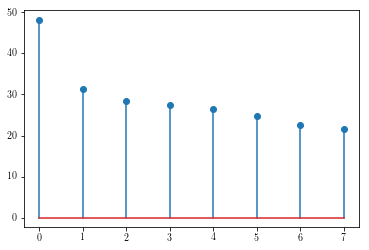

In [4]:
U, S, VT = np.linalg.svd(normalized_ratings)
plt.stem(S)

In [5]:
n = 2  # Take the first two most significant principal components (see singular values above)
first_component, second_component = VT[:n]
print('First principal component is:', np.round(first_component, 3))
print('Second principal component is:', np.round(second_component, 3))

First principal component is: [-0.299 -0.393 -0.428 -0.436 -0.177 -0.403 -0.433 -0.037]
Second principal component is: [-0.026 -0.16  -0.049 -0.025  0.634 -0.071 -0.018  0.751]


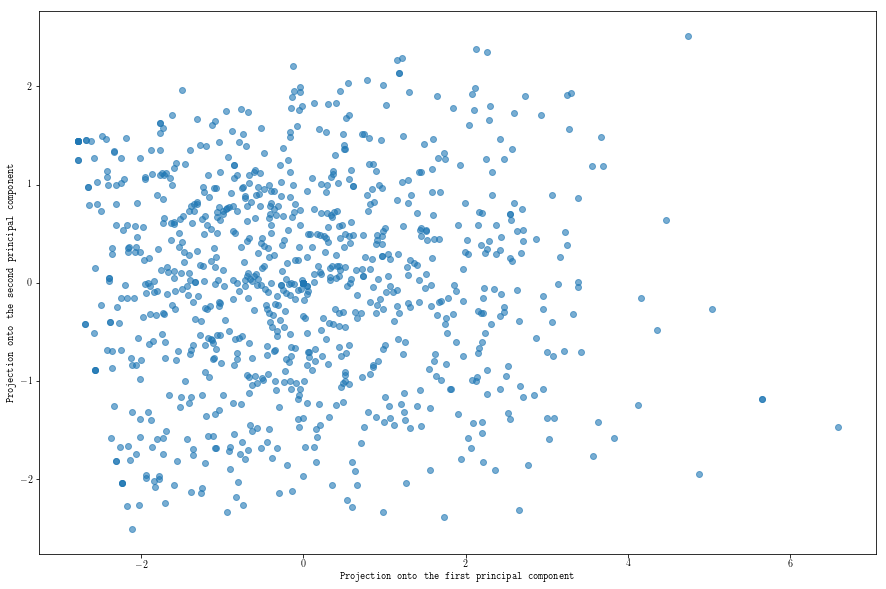

In [6]:
# Taking the transpose of `normalized_ratings`: first participant -> first column, etc.
x = first_component.dot(normalized_ratings.T)
y = second_component.dot(normalized_ratings.T)
plt.figure(figsize=(15, 10))
plt.xlabel('Projection onto the first principal component')
plt.ylabel('Projection onto the second principal component')
plt.scatter(x, y, alpha=0.6)